In [1508]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors,tree

### Clean up the data again for Task3

In [1509]:
mydata = pd.read_csv("./demedian_USA_coviddata_clean_50.csv")
#delete useless feature
mydata = mydata.drop(labels=['Unnamed: 0','sub_region_1','hospitalized_cumulative'],axis=1)

#delete the rows that do not have labels
mydata =mydata[mydata['hospitalized_new'].notna()]
#from task 2 we found it only has 1 feature available, delete it from dataset
mydata =mydata.loc[mydata['open_covid_region_code']!='US-NE']

mydata.fillna(0,inplace=True)
print("#data:",mydata.shape[0])
print("#columns:",mydata.shape[1])


#data: 267
#columns: 17


### Split into the training set and validation set based on its date

In [1510]:
#split into the training set and validation set
mydata_train = mydata[mydata['date']<='2020-08-10'] #use data before ‘2020-08-10’ as training set
mydata_validate = mydata[mydata['date']>'2020-08-10'] #use data after ‘2020-08-10’ as validation set

#delete the region and date features
mydata_train = mydata_train.drop(labels=['date','open_covid_region_code'],axis=1)
mydata_validate = mydata_validate.drop(labels=['date','open_covid_region_code'],axis=1)

# #convert pandas to numpy
mydata_train = mydata_train.values
mydata_validate = mydata_validate.values

#split the data into features and label
x_train,y_train = np.delete(mydata_train,[0],axis=1).astype(np.float),mydata_train[:,0].astype(np.float)
x_validate,y_validate = np.delete(mydata_validate,[0],axis=1).astype(np.float),mydata_validate[:,0].astype(np.float)
print("#datas in training set:",x_train.shape[0])
print("#features in training set:",x_train.shape[1])
print("#data in validation set:",x_validate.shape[0])
print("#features in validation set:",x_validate.shape[1])


#datas in training set: 207
#features in training set: 14
#data in validation set: 60
#features in validation set: 14


###  Define the function tha train the data, do the prediction, and calculate the MSE

In [1511]:
def domodel(x_train,y_train,x_validate,y_validate,modelname):

    loss = lambda y, yh: np.mean((y - yh) ** 2)
    K_list = range(1, 100)
    err_train, err_valid=[], []
    for i, K in enumerate(K_list):
        if modelname == 'knn':
            model = neighbors.KNeighborsRegressor(n_neighbors=K)
        elif modelname == 'dt':
            model = tree.DecisionTreeRegressor(min_samples_leaf=K)
        model = model.fit(x_train, y_train)
        err_valid.append(loss(model.predict(x_validate),y_validate))
        err_train.append(loss(model.predict(x_train),y_train))
        
    return err_valid,err_train

BEST K for date split: 41
Best MSE for date split: 1318.2707614515168


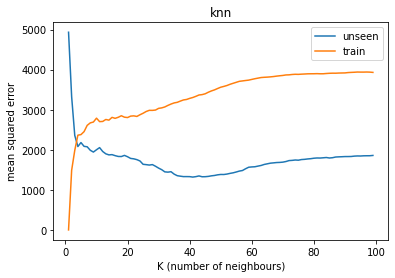

BEST min_samples_leaf for date split: 47
Best MSE for date split: 1298.5780978678013


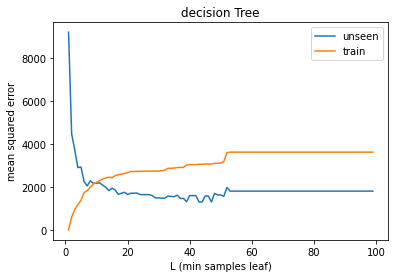

In [1512]:
K_list = range(1, 100)
#Case for knn
err_valid,err_train = domodel(x_train,y_train,x_validate,y_validate,'knn')
best_knn= np.argmin(err_valid) + 1
print("BEST K for date split:",best_knn)
print("Best MSE for date split:",err_valid[best_knn - 1])
plt.plot(K_list, err_valid, '-', label='unseen')
plt.plot(K_list, err_train, '-', label='train')
plt.legend()
plt.title("knn")
plt.xlabel('K (number of neighbours)')
plt.ylabel('mean squared error')
plt.show()
#Case for decesion Tree
err_valid,err_train = domodel(x_train,y_train,x_validate,y_validate,'dt')
best_dt= np.argmin(err_valid) + 1
print("BEST min_samples_leaf for date split:",best_dt)
print("Best MSE for date split:",err_valid[best_dt - 1])
plt.plot(K_list, err_valid, '-', label='unseen')
plt.plot(K_list, err_train, '-', label='train')
plt.legend()
plt.title("decision Tree")
plt.xlabel('L (min samples leaf)')
plt.ylabel('mean squared error')
plt.show()

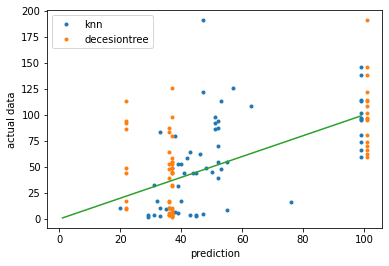

In [1513]:
knn = neighbors.KNeighborsRegressor(n_neighbors=best_knn)
knn.fit(x_train,y_train)
prediction_knn = knn.predict(x_validate).round(0)
dt = tree.DecisionTreeRegressor(min_samples_leaf=best_dt)
dt.fit(x_train,y_train)
prediction_dt = dt.predict(x_validate).round(0)

plt.plot(prediction_knn, y_validate, '.', label='knn')
plt.plot(prediction_dt, y_validate, '.', label='decesiontree')
plt.plot(range(1,100),range(1,100),'-')
plt.legend()
plt.xlabel('prediction')
plt.ylabel('actual data')
plt.show()